### Simple Regression Task

* Description: Power station data
* Samples: 9568
* Attributes:
    * AT (Temperature)
    * V  (Atomsphere)
    * AP (Humidity)
    * RH (Pressure)
    * PE (Power Output)

Assume there is a linear relation between PE and other attributes: 
$$PE=\theta_0+\theta_1*AT+\theta_2*V+\theta_3*AP+\theta_4*RH$$

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

### Load Dataset

In [2]:
data = pd.read_csv('./test.csv')

In [3]:
data.head() # Show the first five samples

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
data.shape # 9568 samlpes with 5 attributes per sample

(9568, 5)

In [5]:
# Select the first four attributes from datasets as the features

X = data[['AT', 'V', 'AP', 'RH']]
X.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [6]:
# Select the last attributes as our regression target

y = data[['PE']]
y.head()

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90


### Split the Dataset into Train/Test Set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7176, 4)
(7176, 1)
(2392, 4)
(2392, 1)


### Train A Linear Model

In [9]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [10]:
# Model parameters
print(linreg.intercept_)
print(linreg.coef_)

[460.05727267]
[[-1.96865472 -0.2392946   0.0568509  -0.15861467]]


### Model Evaluation

In [11]:
# Get predictions in test dataset
y_pred = linreg.predict(X_test)

In [12]:
from sklearn import metrics
# calculate MSE with scikit-learn
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
# calculate RMSE with scikit-learn
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 20.837191547220346
RMSE: 4.564777272465804


### Cross Validation

In [13]:
# In this case, we just assume model is trained/tested on the same dataset

X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=10)

print("MSE:",metrics.mean_squared_error(y, predicted))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE: 20.79367250985753
RMSE: 4.560007950635342


### Result Visualization

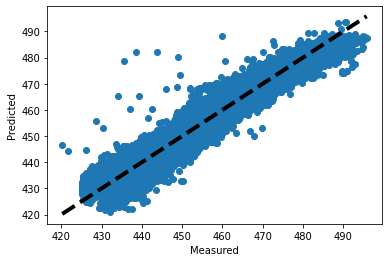

In [14]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()